In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import pandas as pd
import seaborn as sns
from pylab import rcParams

## Считывание данных

In [2]:
data = pd.read_csv('../../data/asteroid.csv')
data.sample(n=5)

full_name         a         e          i          om  \
12748         (2015 LU24)  1.772774  0.360918  22.498375   99.088609   
15733          (2017 EJ1)  1.564136  0.440088   0.285670   32.674675   
10283          (2013 TN4)  1.647807  0.383612  14.255138  189.089697   
13514          (2015 YT9)  1.616930  0.620213  10.416040  125.933637   
13575         (2016 AH65)  1.185515  0.200209  13.796219  284.417797   

                w         q        ad     per_y     H pha  
12748  200.610444  1.132947  2.412600  2.360414  20.4   N  
15733   78.672257  0.875778  2.252493  1.956229  27.7   N  
10283  156.938378  1.015688  2.279926  2.115279  25.2   N  
13514  232.458314  0.614088  2.619772  2.056104  20.6   N  
13575  131.686721  0.948165  1.422866  1.290829  25.8   N

## Предобработка данных

Среди признаков (PHA) содержатся три пустых значения:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25144 entries, 0 to 25143
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   full_name  25144 non-null  object 
 1   a          25144 non-null  float64
 2   e          25144 non-null  float64
 3   i          25144 non-null  float64
 4   om         25144 non-null  float64
 5   w          25144 non-null  float64
 6   q          25144 non-null  float64
 7   ad         25144 non-null  float64
 8   per_y      25144 non-null  float64
 9   H          25144 non-null  float64
 10  pha        25141 non-null  object 
dtypes: float64(9), object(2)
memory usage: 2.1+ MB


Приведем значения столбца PHA к подходящим для бинарной классификации. Удалим все значения NaN из PHA, сопоставим 'N' = -1 и 'Y' = 1.

In [4]:
data.dropna(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25141 entries, 0 to 25143
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   full_name  25141 non-null  object 
 1   a          25141 non-null  float64
 2   e          25141 non-null  float64
 3   i          25141 non-null  float64
 4   om         25141 non-null  float64
 5   w          25141 non-null  float64
 6   q          25141 non-null  float64
 7   ad         25141 non-null  float64
 8   per_y      25141 non-null  float64
 9   H          25141 non-null  float64
 10  pha        25141 non-null  object 
dtypes: float64(9), object(2)
memory usage: 2.3+ MB


In [6]:
pha_dict = {
    'Y': 1,
    'N': -1
}
data['pha'] = data['pha'].apply(lambda x: pha_dict[x] if x in pha_dict else x).astype(float)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25141 entries, 0 to 25143
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   full_name  25141 non-null  object 
 1   a          25141 non-null  float64
 2   e          25141 non-null  float64
 3   i          25141 non-null  float64
 4   om         25141 non-null  float64
 5   w          25141 non-null  float64
 6   q          25141 non-null  float64
 7   ad         25141 non-null  float64
 8   per_y      25141 non-null  float64
 9   H          25141 non-null  float64
 10  pha        25141 non-null  float64
dtypes: float64(10), object(1)
memory usage: 2.3+ MB


Наконец, дадим столбцам более понятные имена:

In [8]:
data.rename(columns = {
    'full_name': 'Asteroid name',
    'a': 'Semi-major axis [AU]',
    'e': 'Eccentricity',
    'i': 'Inclination [deg]',
    'om': 'Node [deg]',
    'w': 'Perihelion argument [deg]',
    'q': 'Perihelion distance [AU]',
    'ad': 'Aphelion distance [AU]',
    'per_y': 'Period [years]',
    'H': 'Absolute magnitude',
    'pha': 'Hazardous'
}, inplace=True)

In [9]:
data.sample(n=5)

Asteroid name  Semi-major axis [AU]  Eccentricity  \
6192            (2008 TC)              2.056686      0.499162   
12640         (2015 KY56)              1.792842      0.476593   
670     162015 (1994 TF2)              0.993179      0.284016   
10276          (2013 TE4)              1.421378      0.264394   
10677         (2014 CB13)              1.826294      0.436349   

       Inclination [deg]  Node [deg]  Perihelion argument [deg]  \
6192            2.670435  211.225539                 106.384386   
12640          15.920179   61.383268                 223.995753   
670            23.752451  175.238959                 349.753313   
10276          14.028043  188.564302                 142.047444   
10677           0.430014  332.785073                 183.507030   

       Perihelion distance [AU]  Aphelion distance [AU]  Period [years]  \
6192                   1.030067                3.083305        2.949581   
12640                  0.938387                2.647297        2.400608   
670                    0.711101                1.275258        0.989805   
10276                  1.045575                1.797182        1.694622   
10677                  1.029393                2.623195        2.468109   

       Absolute magnitude  Hazardous  
6192                 23.7       -1.0  
12640                26.5       -1.0  
670                  19.2       -1.0  
10276                25.1       -1.0  
10677                26.4       -1.0

Сохраним обработанные данные в формате CSV:

In [10]:
data.to_csv('../../data/asteroid_preprocessed.csv', index=False)

## Визуализация и анализ данных

Построим heatmap корреляции:

In [11]:
data = pd.read_csv('../../data/asteroid_preprocessed.csv')

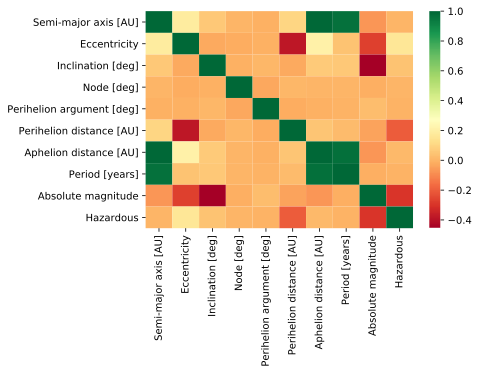

In [12]:
sns.heatmap(data.corr(), cmap='RdYlGn')
plt.show()

Как видно, классы опасности негативно коррелируют со значениями абсолютной звездной величины $H$ и значением радиуса перигелия - таким образом, более яркие объекты и объекты, находящиеся ближе к солнцу менее опасны. Первый факт можно объяснить выражением для диаметра астероида (<https://cneos.jpl.nasa.gov/tools/ast_size_est.html>): $d = 10^{3.1236-0.5\log_{10}(a)-0.2H}$, где $a$ - альбедо и $H$ - абсолютная звездная величина. Чем выше $H$, тем меньше диаметр астероида, следовательно астероид менее опасен.

Рассмотрим процентное соотношение количества потенциально опасных астероидов и количества безопасных астероидов:

In [13]:
hazardous = data[data.Hazardous == 1]
non_hazardous = data[data.Hazardous == -1]

In [14]:
print('Hazardous: {:.2f}%'.format(100*len(hazardous)/len(data)))
print('Non-Hazardous: {:.2f}%'.format(100*len(non_hazardous)/len(data)))

Hazardous: 8.52%
Non-Hazardous: 91.48%


Как видно, примерно каждый одинадцатый астероид потенциально опасен. Для получения качественной модели данный фактор должен быть учтен.

Рассмотрим диаграммы размаха:

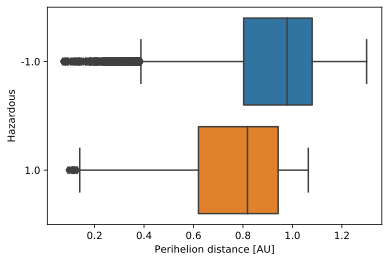

In [15]:
sns.boxplot(x='Perihelion distance [AU]', y='Hazardous', data=data, orient='h')
plt.show()

Как видно, потенциально опасные астероиды в среднем находятся дальше от Земли (1 а.е) и не отдаляются дальше ~1.1 а.е.  
Рассмотрим процентное соотношение выбросов:

In [16]:
Q1_hazardous = hazardous['Perihelion distance [AU]'].quantile(0.25)
Q3_hazardous = hazardous['Perihelion distance [AU]'].quantile(0.75)
outliers_left_hazardous = Q1_hazardous - 1.5*(Q3_hazardous - Q1_hazardous)
outliers_right_hazardous = Q3_hazardous + 1.5*(Q3_hazardous - Q1_hazardous)

In [17]:
outliers_hazardous = len(hazardous[hazardous['Perihelion distance [AU]'] < outliers_left_hazardous]) + \
    len(hazardous[hazardous['Perihelion distance [AU]'] > outliers_right_hazardous])
print(outliers_hazardous)

10


In [18]:
Q1_non_hazardous = non_hazardous['Perihelion distance [AU]'].quantile(0.25)
Q3_non_hazardous = non_hazardous['Perihelion distance [AU]'].quantile(0.75)
outliers_left_non_hazardous = Q1_non_hazardous - 1.5*(Q3_non_hazardous - Q1_non_hazardous)
outliers_right_non_hazardous = Q3_non_hazardous + 1.5*(Q3_non_hazardous - Q1_non_hazardous)

In [19]:
outliers_non_hazardous = len(non_hazardous[non_hazardous['Perihelion distance [AU]'] < outliers_left_non_hazardous]) + \
    len(non_hazardous[non_hazardous['Perihelion distance [AU]'] > outliers_right_non_hazardous])
print(outliers_non_hazardous)

566


In [20]:
print('Hazardous: {:.2f}%'.format(100*outliers_hazardous/len(hazardous)))
print('Non-Hazardous: {:.2f}%'.format(100*outliers_non_hazardous/len(non_hazardous)))

Hazardous: 0.47%
Non-Hazardous: 2.46%


Как видно, примерно 2.5% безопасных астероидов являются выбросами относительно радиуса перигелия. Это может свидетельствовать о несильной зависимости радиуса перигелия и безопасности астероидов. В свою очередь, это может быть следствием или причиной несильной корреляции радиуса перигелия и класса опасности астероидов.

Также рассмотрим диаграмму размаха зависимости класса опасности астероида от абсолютной звездной величины:

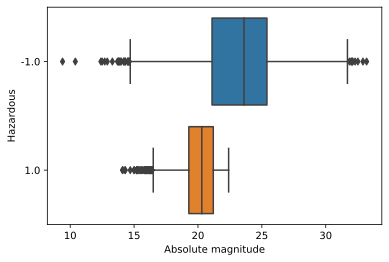

In [21]:
sns.boxplot(x='Absolute magnitude', y='Hazardous', data=data, orient='h')
plt.show()

Как видно, большинство опасных астероидов имеют показатель звездной величины от 16 примерно до 22, в то время как безопасные астероиды имеют больший разброс.  
Рассмотрим процентное соотношение выбросов:

In [22]:
Q1_hazardous = hazardous['Absolute magnitude'].quantile(0.25)
Q3_hazardous = hazardous['Absolute magnitude'].quantile(0.75)
outliers_left_hazardous = Q1_hazardous - 1.5*(Q3_hazardous - Q1_hazardous)
outliers_right_hazardous = Q3_hazardous + 1.5*(Q3_hazardous - Q1_hazardous)

In [23]:
outliers_hazardous = len(hazardous[hazardous['Absolute magnitude'] < outliers_left_hazardous]) + \
    len(hazardous[hazardous['Absolute magnitude'] > outliers_right_hazardous])
print(outliers_hazardous)

47


In [24]:
Q1_non_hazardous = non_hazardous['Absolute magnitude'].quantile(0.25)
Q3_non_hazardous = non_hazardous['Absolute magnitude'].quantile(0.75)
outliers_left_non_hazardous = Q1_non_hazardous - 1.5*(Q3_non_hazardous - Q1_non_hazardous)
outliers_right_non_hazardous = Q3_non_hazardous + 1.5*(Q3_non_hazardous - Q1_non_hazardous)

In [25]:
outliers_non_hazardous = len(non_hazardous[non_hazardous['Absolute magnitude'] < outliers_left_non_hazardous]) + \
    len(non_hazardous[non_hazardous['Absolute magnitude'] > outliers_right_non_hazardous])
print(outliers_non_hazardous)

34


In [26]:
print('Hazardous: {:.2f}%'.format(100*outliers_hazardous/len(hazardous)))
print('Non-Hazardous: {:.2f}%'.format(100*outliers_non_hazardous/len(non_hazardous)))

Hazardous: 2.20%
Non-Hazardous: 0.15%


Как видно, примерно 2.2% опасных астероидов являются выбросами относительно абсолютной звездной величины. Это может свидетельствовать о несильной зависимости радиуса перигелия и безопасности астероидов. В свою очередь, это может быть следствием или причиной несильной корреляции радиуса перигелия и класса опасности астероидов.